In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv("Financial Statements.csv")

In [36]:
df.head()

,Year,Company,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,EBITDA,Share Holder Equity,...,Current Ratio,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin,Free Cash Flow per Share,Return on Tangible Equity,Number of Employees,Inflation Rate(in US)
0,2022,AAPL,IT,2066.94,394328.0,170782.0,99803.0,6.11,130541.0,50672.0,...,0.8794,2.3695,196.9589,28.2924,66.6994,25.3096,1.3146,196.9589,164000,8.0028
1,2021,AAPL,IT,2913.28,365817.0,152836.0,94680.0,5.61,120233.0,63090.0,...,1.0746,1.9768,150.0713,26.9742,54.9839,25.8818,1.3261,150.0713,154000,4.6979
2,2020,AAPL,IT,2255.97,274515.0,104956.0,57411.0,3.28,77344.0,65339.0,...,1.3636,1.7208,87.8664,17.7256,35.0054,20.9136,1.0183,87.8664,147000,1.2336
3,2019,AAPL,IT,1304.76,260174.0,98392.0,55256.0,2.97,76477.0,90488.0,...,1.5401,1.1940,61.0645,16.3230,30.3113,21.2381,-0.0388,61.0645,137000,1.8122
4,2018,AAPL,IT,748.54,265595.0,101839.0,59531.0,2.98,81801.0,107147.0,...,1.1329,1.0685,55.5601,16.2775,29.6348,22.4142,0.7414,55.5601,132000,2.4426


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 161 non-null    int64  
 1   Company                              161 non-null    object 
 2   Category                             161 non-null    object 
 3   Market Cap(in B USD)                 160 non-null    float64
 4   Revenue                              161 non-null    float64
 5   Gross Profit                         161 non-null    float64
 6   Net Income                           161 non-null    float64
 7   Earning Per Share                    161 non-null    float64
 8   EBITDA                               161 non-null    float64
 9   Share Holder Equity                  161 non-null    float64
 10  Cash Flow from Operating             161 non-null    float64
 11  Cash Flow from Investing        

In [38]:
df.columns = df.columns.str.strip()


In [39]:
df.columns

Index(['Year', 'Company', 'Category', 'Market Cap(in B USD)', 'Revenue',
       'Gross Profit', 'Net Income', 'Earning Per Share', 'EBITDA',
       'Share Holder Equity', 'Cash Flow from Operating',
       'Cash Flow from Investing', 'Cash Flow from Financial Activities',
       'Current Ratio', 'Debt/Equity Ratio', 'ROE', 'ROA', 'ROI',
       'Net Profit Margin', 'Free Cash Flow per Share',
       'Return on Tangible Equity', 'Number of Employees',
       'Inflation Rate(in US)'],
      dtype='object')

In [40]:
df.Company.value_counts().reset_index()

,Company,count
0,MSFT,15
1,NVDA,15
2,AAPL,14
3,GOOG,14
4,AIG,14
5,PCG,14
6,MCD,14
7,BCS,14
8,INTC,14
9,AMZN,14


In [41]:
# Dictionary to map ticker to full company name
company_map = {
    "NVDA": "Nvidia",
    "GOOG": "Google",
    "AAPL": "Apple",
    "MSFT": "Microsoft",
    "AMZN": "Amazon",
    "MCD": "McDonald's",
    "BCS": "Barclays",
    "PYPL": "PayPal",
    "INTC": "Intel",
    "AIG": "American International Group",
    "PCG": "PG&E",
    "SHLDQ": "Sears Holdings",
    # Add more mappings as needed
}

# Apply the mapping
df['Company_Full'] = df['Company'].replace(company_map)


In [42]:
df['Company_Full'] .value_counts().reset_index()

,Company_Full,count
0,Microsoft,15
1,Nvidia,15
2,Apple,14
3,Google,14
4,American International Group,14
5,PG&E,14
6,McDonald's,14
7,Barclays,14
8,Intel,14
9,Amazon,14


In [44]:
df.head()

,Year,Company,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,EBITDA,Share Holder Equity,...,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin,Free Cash Flow per Share,Return on Tangible Equity,Number of Employees,Inflation Rate(in US),Company_Full
0,2022,AAPL,IT,2066.94,394328.0,170782.0,99803.0,6.11,130541.0,50672.0,...,2.3695,196.9589,28.2924,66.6994,25.3096,1.3146,196.9589,164000,8.0028,Apple
1,2021,AAPL,IT,2913.28,365817.0,152836.0,94680.0,5.61,120233.0,63090.0,...,1.9768,150.0713,26.9742,54.9839,25.8818,1.3261,150.0713,154000,4.6979,Apple
2,2020,AAPL,IT,2255.97,274515.0,104956.0,57411.0,3.28,77344.0,65339.0,...,1.7208,87.8664,17.7256,35.0054,20.9136,1.0183,87.8664,147000,1.2336,Apple
3,2019,AAPL,IT,1304.76,260174.0,98392.0,55256.0,2.97,76477.0,90488.0,...,1.1940,61.0645,16.3230,30.3113,21.2381,-0.0388,61.0645,137000,1.8122,Apple
4,2018,AAPL,IT,748.54,265595.0,101839.0,59531.0,2.98,81801.0,107147.0,...,1.0685,55.5601,16.2775,29.6348,22.4142,0.7414,55.5601,132000,2.4426,Apple


In [46]:
cols = list(df.columns)
last_col = cols.pop()
cols.insert(2, last_col)  # Index 2 = 3rd column
df = df[cols]


In [47]:
df.head()

,Year,Company,Company_Full,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,EBITDA,...,Current Ratio,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin,Free Cash Flow per Share,Return on Tangible Equity,Number of Employees,Inflation Rate(in US)
0,2022,AAPL,Apple,IT,2066.94,394328.0,170782.0,99803.0,6.11,130541.0,...,0.8794,2.3695,196.9589,28.2924,66.6994,25.3096,1.3146,196.9589,164000,8.0028
1,2021,AAPL,Apple,IT,2913.28,365817.0,152836.0,94680.0,5.61,120233.0,...,1.0746,1.9768,150.0713,26.9742,54.9839,25.8818,1.3261,150.0713,154000,4.6979
2,2020,AAPL,Apple,IT,2255.97,274515.0,104956.0,57411.0,3.28,77344.0,...,1.3636,1.7208,87.8664,17.7256,35.0054,20.9136,1.0183,87.8664,147000,1.2336
3,2019,AAPL,Apple,IT,1304.76,260174.0,98392.0,55256.0,2.97,76477.0,...,1.5401,1.1940,61.0645,16.3230,30.3113,21.2381,-0.0388,61.0645,137000,1.8122
4,2018,AAPL,Apple,IT,748.54,265595.0,101839.0,59531.0,2.98,81801.0,...,1.1329,1.0685,55.5601,16.2775,29.6348,22.4142,0.7414,55.5601,132000,2.4426


In [50]:
df.Category.value_counts().reset_index()

,Category,count
0,IT,43
1,ELEC,29
2,Bank,14
3,Manufacturing,14
4,FOOD,14
5,BANK,14
6,LOGI,14
7,Finance,10
8,FinTech,9


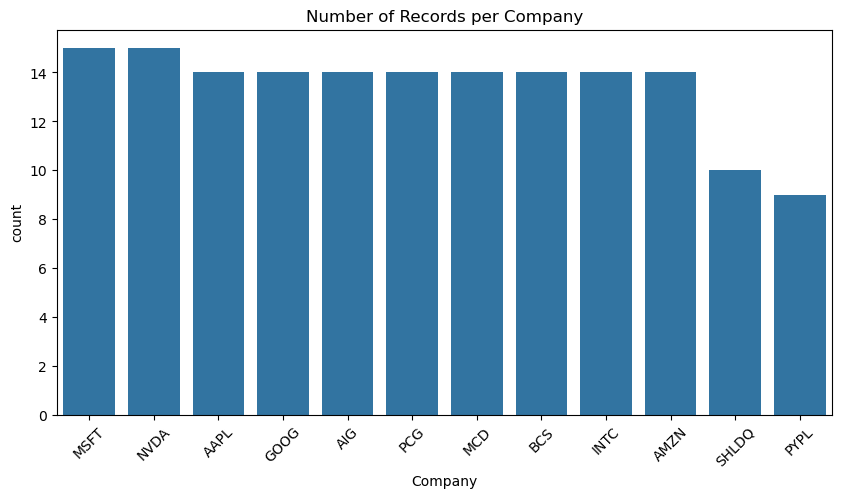

In [64]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Company', order=df['Company'].value_counts().index)
plt.title('Number of Records per Company')
plt.xticks(rotation=45)
plt.show()


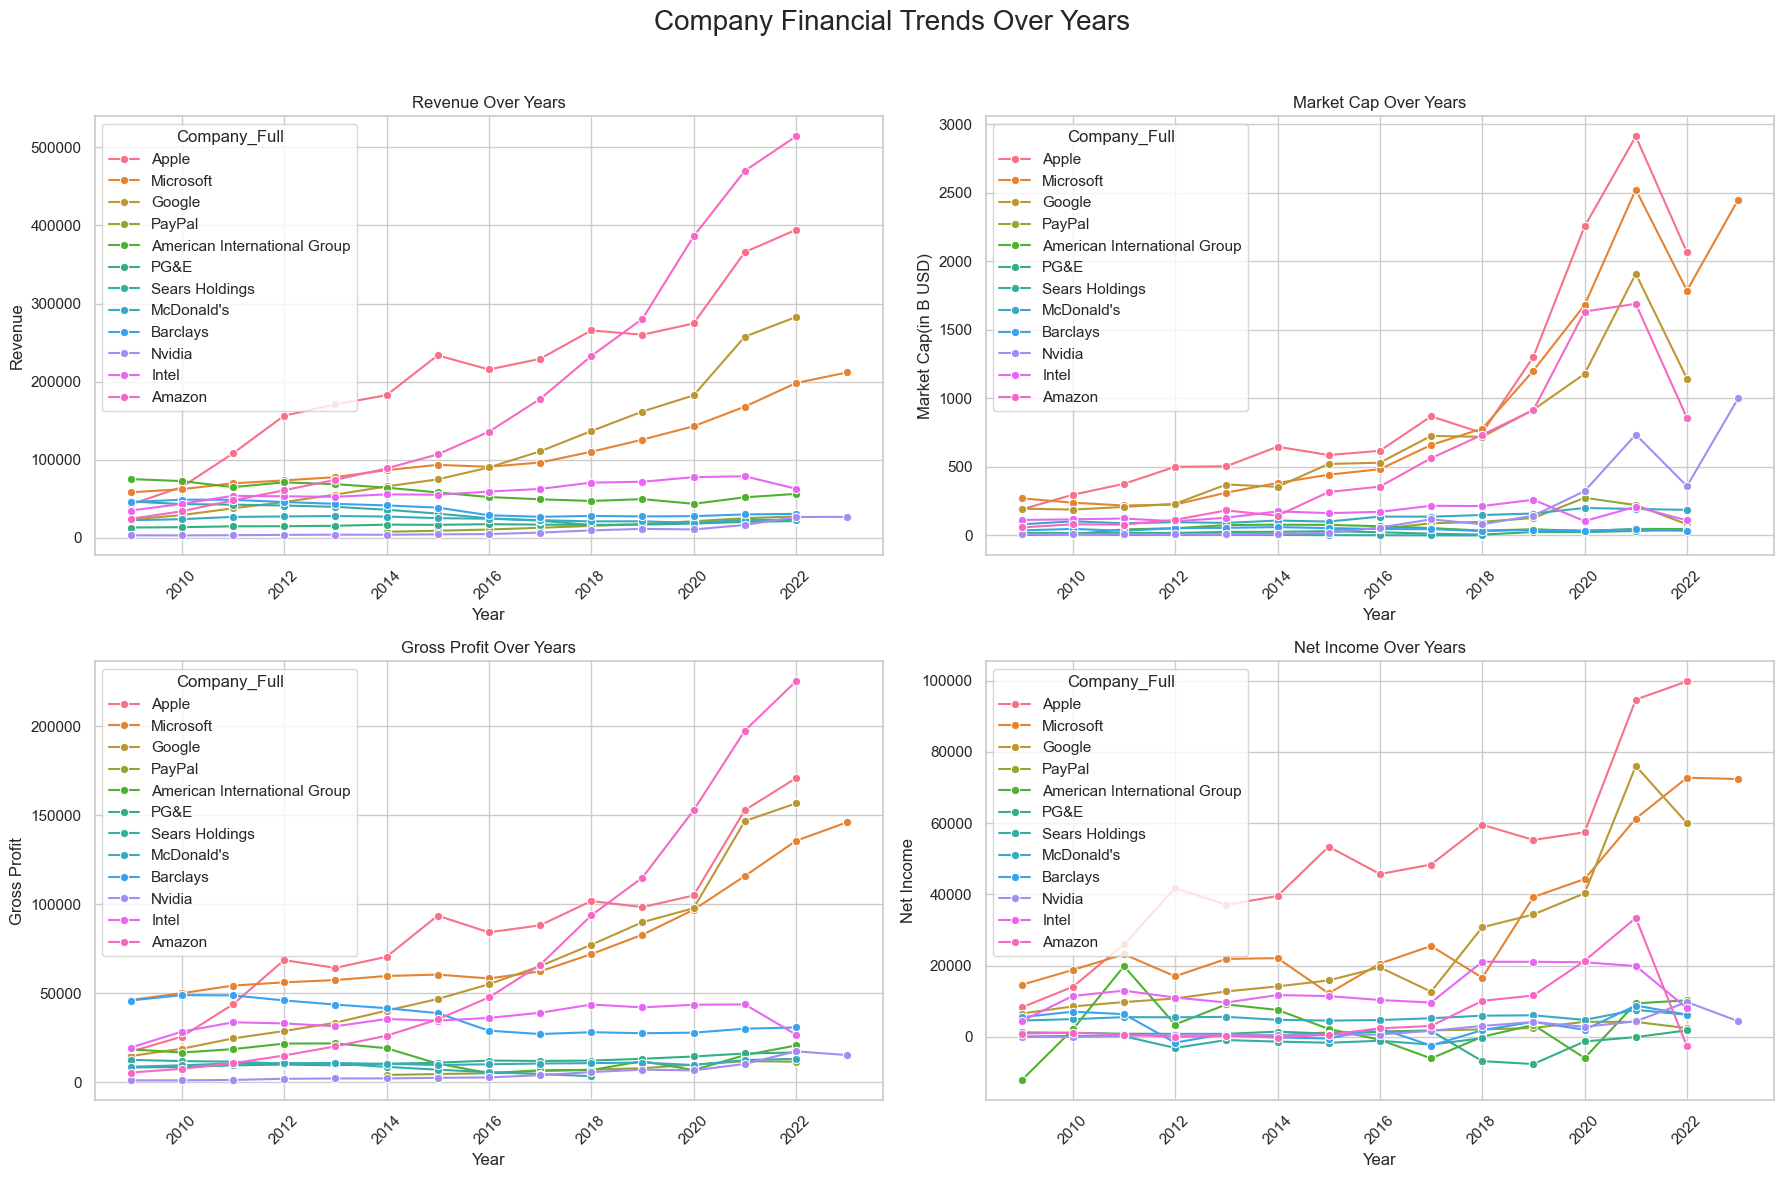

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Company Financial Trends Over Years', fontsize=20)

# Revenue
sns.lineplot(data=df, x='Year', y='Revenue', hue='Company_Full', marker='o', ax=axs[0, 0])
axs[0, 0].set_title('Revenue Over Years')
axs[0, 0].tick_params(axis='x', rotation=45)

# Market Cap
sns.lineplot(data=df, x='Year', y='Market Cap(in B USD)', hue='Company_Full', marker='o', ax=axs[0, 1])
axs[0, 1].set_title('Market Cap Over Years')
axs[0, 1].tick_params(axis='x', rotation=45)

# Gross Profit
sns.lineplot(data=df, x='Year', y='Gross Profit', hue='Company_Full', marker='o', ax=axs[1, 0])
axs[1, 0].set_title('Gross Profit Over Years')
axs[1, 0].tick_params(axis='x', rotation=45)

# Net Income
sns.lineplot(data=df, x='Year', y='Net Income', hue='Company_Full', marker='o', ax=axs[1, 1])
axs[1, 1].set_title('Net Income Over Years')
axs[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [66]:
def plot_company_metric(query, df):
    try:
        # Split the input query
        company, metric = query.split('(')
        company = company.strip()
        metric = metric.strip(') ').strip()

        # Validate inputs
        if company not in df['Company_Full'].unique():
            print(f"Company '{company}' not found.")
            return
        if metric not in df.columns:
            print(f"Metric '{metric}' not found in dataset.")
            return

        # Filter and plot
        company_data = df[df['Company_Full'] == company]
        plt.figure(figsize=(10, 5))
        sns.lineplot(data=company_data, x='Year', y=metric, marker='o')
        plt.title(f"{metric} Over Years for {company}")
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    except ValueError:
        print("Please enter in format: CompanyName (Metric)")


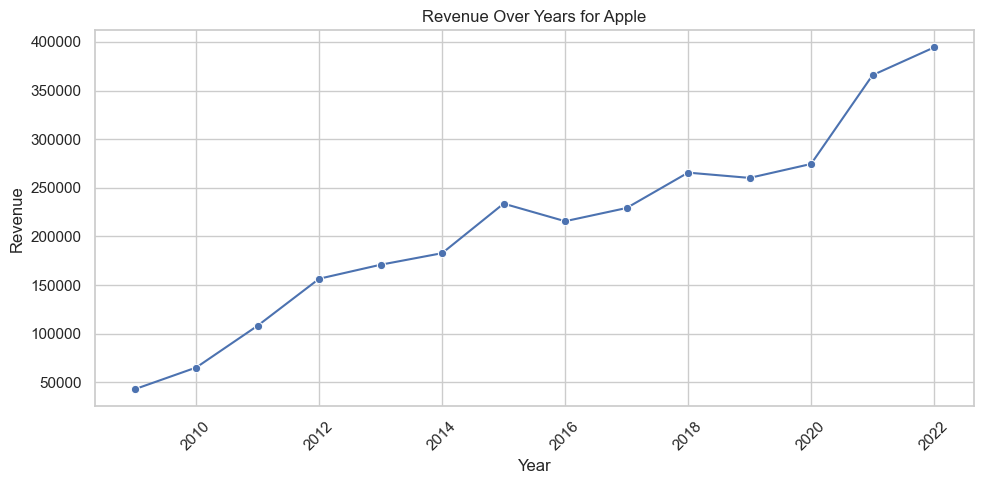

In [71]:
plot_company_metric("Apple(Revenue)", df)


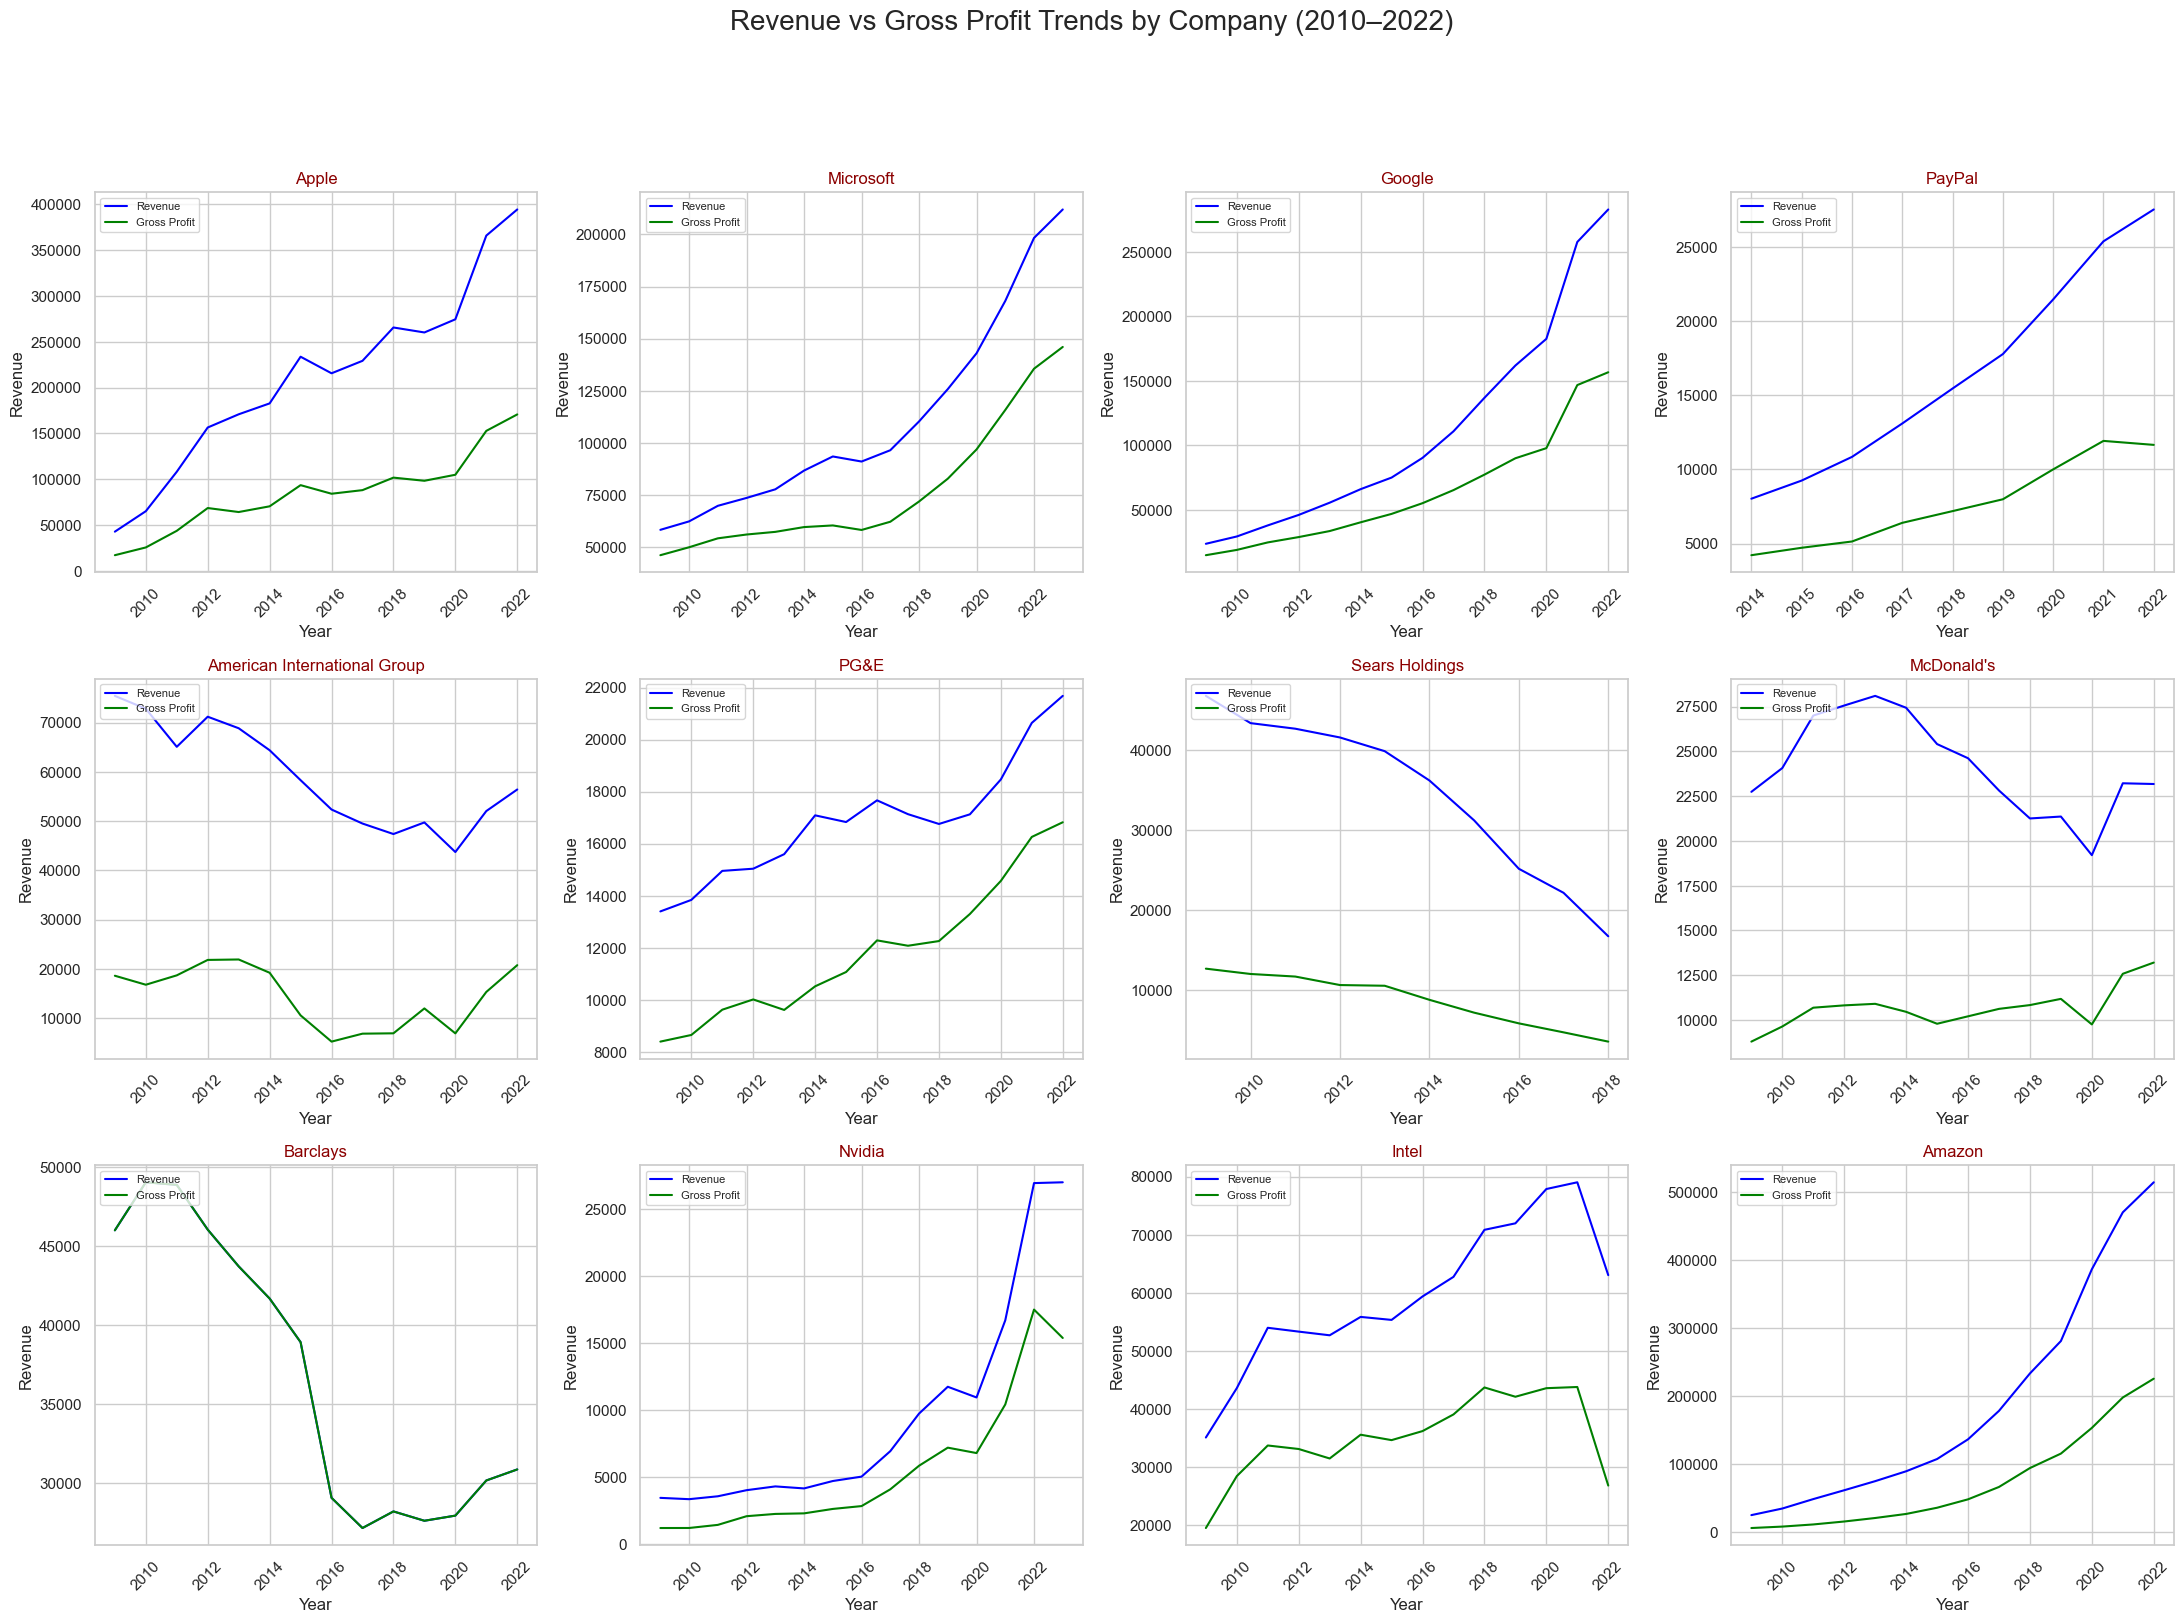

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

companies = df['Company_Full'].unique()

# Set up 4x4 grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(22, 20))
fig.suptitle('Revenue vs Gross Profit Trends by Company (2010–2022)', fontsize=20, y=1.02)

axes = axes.flatten()

for i, company in enumerate(companies):
    company_data = df[df['Company_Full'] == company]
    
    sns.lineplot(data=company_data, x='Year', y='Revenue', ax=axes[i], label='Revenue', color='blue')
    sns.lineplot(data=company_data, x='Year', y='Gross Profit', ax=axes[i], label='Gross Profit', color='green')
    
    axes[i].set_title(company, fontsize=12, color='darkred')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(loc='upper left', fontsize=8)

# Remove unused plots
for j in range(len(companies), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


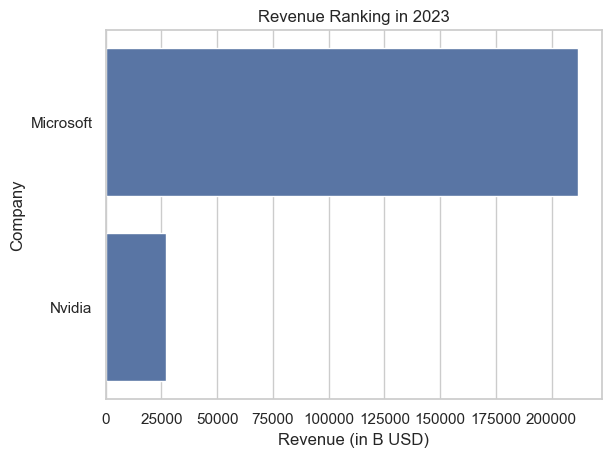

In [76]:
# Rank companies by latest year's revenue
latest_year = df['Year'].max()
latest_data = df[df['Year'] == latest_year]

top_revenue = latest_data.sort_values(by='Revenue', ascending=False)[['Company_Full', 'Revenue']]

sns.barplot(data=top_revenue, x='Revenue', y='Company_Full')
plt.title(f'Revenue Ranking in {latest_year}')
plt.xlabel('Revenue (in B USD)')
plt.ylabel('Company')
plt.show()


In [85]:
df.loc[df['Year'] == 2023,:]

,Year,Company,Company_Full,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,EBITDA,...,Current Ratio,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin,Free Cash Flow per Share,Return on Tangible Equity,Number of Employees,Inflation Rate(in US)
14,2023,MSFT,Microsoft,IT,2451.23,211915.0,146052.0,72361.0,9.68,102384.0,...,1.7692,0.2291,35.0887,17.5644,29.1528,34.1462,-0.6808,56.1064,221000,3.7
118,2023,NVDA,Nvidia,ELEC,1000.35,26974.0,15356.0,4368.0,1.74,5768.0,...,3.5156,0.4956,19.7638,10.6066,13.7341,16.1934,-1.6890,27.2099,26196,3.7


In [98]:
top_companies = df.groupby('Company_Full')[
    ['Revenue', 'Gross Profit', 'Market Cap(in B USD)', 'Net Income',
     'Earning Per Share', 'Net Profit Margin', 'ROE', 'ROA', 'ROI', 'Debt/Equity Ratio']
].sum().idxmax()

top_companies_df = top_companies.reset_index()
top_companies_df.columns = ['Metric', 'Top Company']

# Display result
top_companies_df


,Metric,Top Company
0,Revenue,Apple
1,Gross Profit,Apple
2,Market Cap(in B USD),Apple
3,Net Income,Apple
4,Earning Per Share,McDonald's
5,Net Profit Margin,Microsoft
6,ROE,Apple
7,ROA,Apple
8,ROI,Apple
9,Debt/Equity Ratio,Barclays


In [99]:
loss_companies = df.groupby('Company_Full')[
    ['Revenue', 'Gross Profit', 'Market Cap(in B USD)', 'Net Income',
     'Earning Per Share', 'Net Profit Margin', 'ROE', 'ROA', 'ROI', 'Debt/Equity Ratio']
].sum().idxmin()

loss_companies_df = loss_companies.reset_index()
loss_companies_df.columns = ['Metric', 'Top Company']

# Display result
loss_companies_df

,Metric,Top Company
0,Revenue,Nvidia
1,Gross Profit,PayPal
2,Market Cap(in B USD),Sears Holdings
3,Net Income,Sears Holdings
4,Earning Per Share,Sears Holdings
5,Net Profit Margin,Sears Holdings
6,ROE,McDonald's
7,ROA,Sears Holdings
8,ROI,PG&E
9,Debt/Equity Ratio,McDonald's


In [104]:
# Step 1: Get the latest year for each company
latest_year_df = df.sort_values('Year').groupby('Company_Full').tail(1)

# Step 2: Apply multiple poor performance filters
bad_companies = latest_year_df[
    (latest_year_df['Net Income'] < 0) |
    (latest_year_df['Net Profit Margin'] < 0) |
    (latest_year_df['ROE'] < 5) |
    (latest_year_df['ROA'] < 3) |
    (latest_year_df['ROI'] < 0) |
    (latest_year_df['Earning Per Share'] < 0) |
    (latest_year_df['Debt/Equity Ratio'] > 2)
]

# Step 3: Print the companies flagged
print("Companies potentially under financial stress:")
bad_companies


Companies potentially under financial stress:


,Year,Company,Company_Full,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,EBITDA,...,Current Ratio,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin,Free Cash Flow per Share,Return on Tangible Equity,Number of Employees,Inflation Rate(in US)
80,2018,SHLDQ,Sears Holdings,Finance,0.04,16702.00,3527.00,-383.000,-3.5700,-52.0,...,0.7756,-1.1099,10.2874,-5.2740,25.9837,-2.2931,3.0663,7.4225,89900,2.4426
104,2022,BCS,Barclays,BANK,32.53,30868.08,30868.08,6212.949,1.4744,1.0,...,1.0000,7.1602,8.6240,0.3946,1.2840,21.1620,-6.5477,9.7884,87400,8.0028
90,2022,MCD,McDonald's,FOOD,186.39,23182.60,13207.20,6177.400,8.3300,11241.6,...,1.4266,-5.9805,-102.8983,12.2481,20.6601,26.6467,-2.1323,-69.3794,150000,8.0028
66,2022,PCG,PG&E,Manufacturing,41.28,21680.00,16824.00,1800.000,0.8400,5693.0,...,0.8117,2.2563,7.8613,1.5289,2.5615,8.3026,-0.0160,7.8613,26010,8.0028
147,2022,AMZN,Amazon,LOGI,856.94,513983.00,225152.00,-2722.000,-0.2700,54169.0,...,0.9446,0.4598,-1.8638,-0.5883,-1.2768,-0.5296,-0.2546,-2.1645,1541000,8.0028
52,2022,AIG,American International Group,Bank,46.99,56437.00,20762.00,10247.000,13.0100,20640.0,...,1.0000,0.6435,27.0084,2.1411,16.2446,18.1565,-1.9207,26.6982,26200,8.0028
0,2022,AAPL,Apple,IT,2066.94,394328.00,170782.00,99803.000,6.1100,130541.0,...,0.8794,2.3695,196.9589,28.2924,66.6994,25.3096,1.3146,196.9589,164000,8.0028


In [108]:
category_company = df.groupby(['Category', 'Company_Full'])[
    ['Revenue', 'Gross Profit', 'Net Income', 'ROE', 'ROA', 'ROI']
].mean().sort_values(by='Net Income', ascending=False).reset_index()


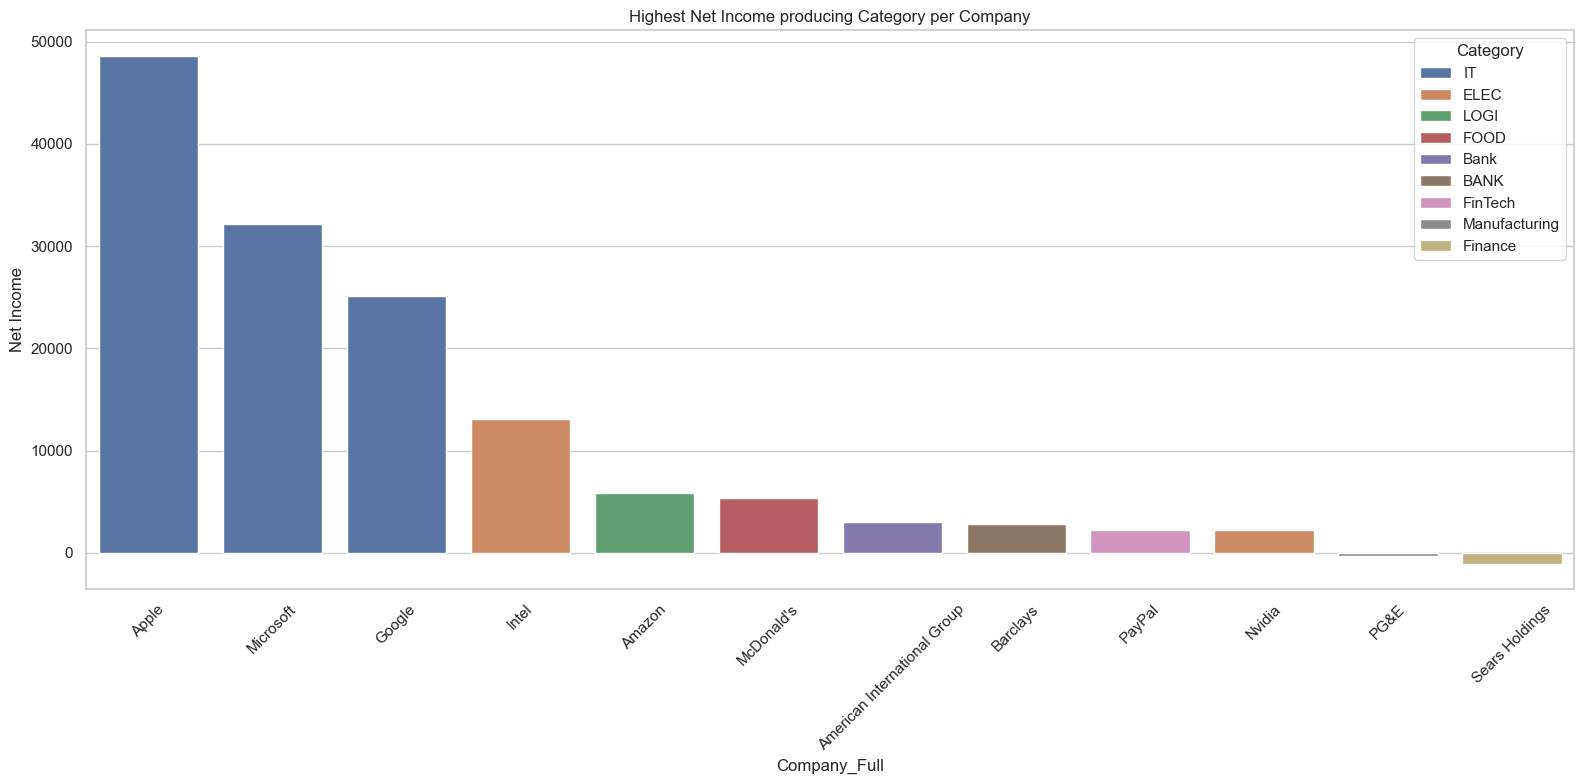

In [113]:
plt.figure(figsize=(16, 8))
sns.barplot(
    data=category_company,
    x='Company_Full',
    y='Net Income',
    hue='Category'
)
plt.title('Net Income by Company within Each Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.title("Highest Net Income producing Category per Company")
plt.show()


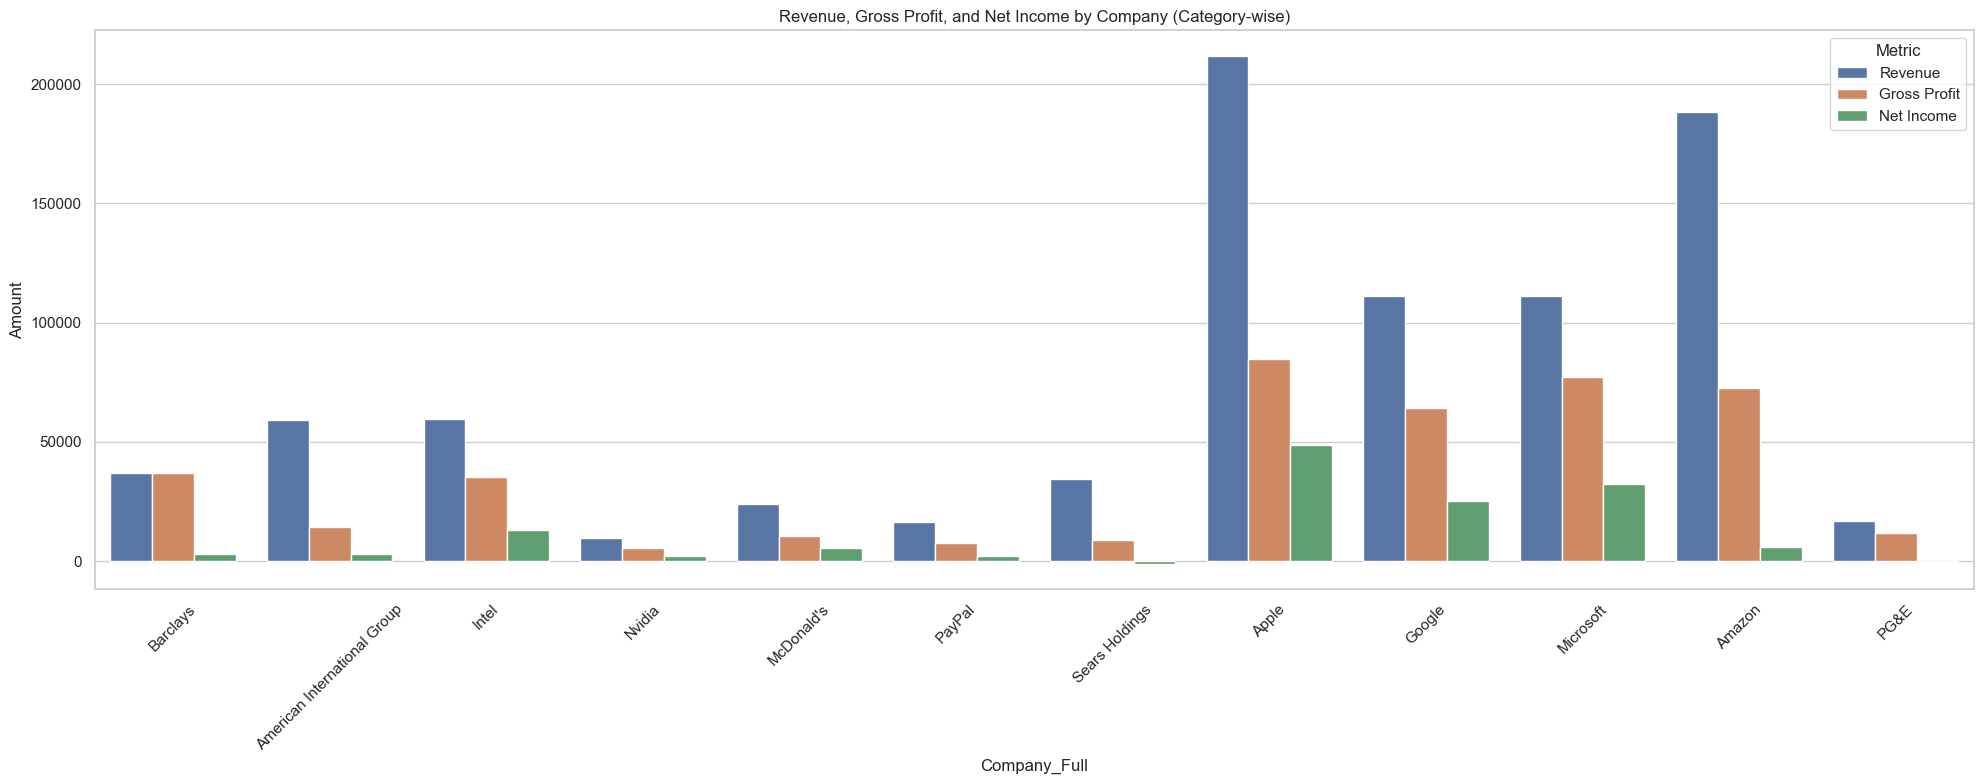

In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Group and reset
category_company = df.groupby(['Category', 'Company_Full'])[
    ['Revenue', 'Gross Profit', 'Net Income']
].mean().reset_index()

# Step 2: Melt to long format for grouped bar plot
melted_df = category_company.melt(
    id_vars=['Category', 'Company_Full'],
    value_vars=['Revenue', 'Gross Profit', 'Net Income'],
    var_name='Metric',
    value_name='Amount'
)

# Step 3: Plot
plt.figure(figsize=(20, 8))
sns.barplot(
    data=melted_df,
    x='Company_Full',
    y='Amount',
    hue='Metric'
)
plt.title('Revenue, Gross Profit, and Net Income by Company (Category-wise)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [122]:
df.drop(columns = ['Number of Employees'],inplace = True)

KeyError: "['Number of Employees'] not found in axis"

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 161 non-null    int64  
 1   Company                              161 non-null    object 
 2   Company_Full                         161 non-null    object 
 3   Category                             161 non-null    object 
 4   Market Cap(in B USD)                 160 non-null    float64
 5   Revenue                              161 non-null    float64
 6   Gross Profit                         161 non-null    float64
 7   Net Income                           161 non-null    float64
 8   Earning Per Share                    161 non-null    float64
 9   EBITDA                               161 non-null    float64
 10  Share Holder Equity                  161 non-null    float64
 11  Cash Flow from Operating        

In [131]:
cols_to_keep = [
    'Year', 'Company_Full', 'Category',
    'Market Cap(in B USD)', 'Revenue', 'Net Income',
    'Earning Per Share', 'Share Holder Equity',
    'Current Ratio','Debt/Equity Ratio', 'ROE', 'ROA', 'ROI', 'Net Profit Margin'
]

df1 = df[cols_to_keep]


In [132]:
df1

,Year,Company_Full,Category,Market Cap(in B USD),Revenue,Net Income,Earning Per Share,Share Holder Equity,Current Ratio,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin
0,2022,Apple,IT,2066.94,394328.0,99803.0,6.1100,50672.0,0.8794,2.3695,196.9589,28.2924,66.6994,25.3096
1,2021,Apple,IT,2913.28,365817.0,94680.0,5.6100,63090.0,1.0746,1.9768,150.0713,26.9742,54.9839,25.8818
2,2020,Apple,IT,2255.97,274515.0,57411.0,3.2800,65339.0,1.3636,1.7208,87.8664,17.7256,35.0054,20.9136
3,2019,Apple,IT,1304.76,260174.0,55256.0,2.9700,90488.0,1.5401,1.1940,61.0645,16.3230,30.3113,21.2381
4,2018,Apple,IT,748.54,265595.0,59531.0,2.9800,107147.0,1.1329,1.0685,55.5601,16.2775,29.6348,22.4142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,2013,Amazon,LOGI,182.54,74452.0,274.0,0.0295,9746.0,1.0716,0.3274,2.8114,0.6823,2.1180,0.3680
157,2012,Amazon,LOGI,113.63,61093.0,-39.0,-0.0045,8192.0,1.1207,0.3765,-0.4761,-0.1198,-0.3459,-0.0638
158,2011,Amazon,LOGI,78.72,48077.0,631.0,0.0685,7757.0,1.1741,0.0329,8.1346,2.4962,7.8757,1.3125
159,2010,Amazon,LOGI,80.79,34204.0,1152.0,0.1265,6864.0,1.3254,0.2274,16.7832,6.1286,13.6736,3.3680


In [147]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# List of numeric financial columns to standardize
financial_cols = [
    'Market Cap(in B USD)', 'Revenue', 'Net Income', 'Earning Per Share',
    'Share Holder Equity', 'Current Ratio', 'Debt/Equity Ratio',
    'ROE', 'ROA', 'ROI', 'Net Profit Margin'
]

# Initialize the scaler
scaler = StandardScaler()

# Standardize
df_scaled = scaler.fit_transform(df[financial_cols])

# Convert back to DataFrame
df_standardized = pd.DataFrame(df_scaled, columns=financial_cols)

# Merge back with non-scaled columns
df_final = pd.concat([df1[['Year', 'Company_Full', 'Category']].reset_index(drop=True), df_standardized], axis=1)

df_final.head()


,Year,Company_Full,Category,Market Cap(in B USD),Revenue,Net Income,Earning Per Share,Share Holder Equity,Current Ratio,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin
0,2022,Apple,IT,3.205981,3.518779,4.521686,0.579538,-0.120638,-0.698163,0.689763,4.133842,2.337519,0.588845,0.870102
1,2021,Apple,IT,4.774994,3.203756,4.257028,0.523021,0.109624,-0.580270,0.532644,3.083446,2.187298,0.462999,0.912931
2,2020,Apple,IT,3.556420,2.194945,2.331680,0.259652,0.151326,-0.405724,0.430219,1.689905,1.133336,0.248394,0.541062
3,2019,Apple,IT,1.792991,2.036489,2.220351,0.224611,0.617653,-0.299124,0.219446,1.089477,0.973497,0.197971,0.565351
4,2018,Apple,IT,0.761825,2.096386,2.441201,0.225742,0.926554,-0.545058,0.169234,0.966165,0.968312,0.190704,0.653382


In [148]:
df_final.isnull().values.any()


True

In [149]:
df_final.isnull().sum()

Year                    0
Company_Full            0
Category                0
Market Cap(in B USD)    1
Revenue                 0
Net Income              0
Earning Per Share       0
Share Holder Equity     0
Current Ratio           0
Debt/Equity Ratio       0
ROE                     0
ROA                     0
ROI                     0
Net Profit Margin       0
dtype: int64

In [150]:
df_final[df_final['Market Cap(in B USD)'].isnull()]


,Year,Company_Full,Category,Market Cap(in B USD),Revenue,Net Income,Earning Per Share,Share Holder Equity,Current Ratio,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin
51,2014,PayPal,FinTech,NaN,-0.749549,-0.612574,-0.072668,-0.907288,-0.430607,-0.205259,-0.164712,-0.668789,-0.073059,-0.633511


In [151]:
# Replace NaN values with the mean of the column
df_final['Market Cap(in B USD)'] = df_final['Market Cap(in B USD)'].fillna(df_final['Market Cap(in B USD)'].mean())


In [152]:
df_final.isnull().sum()

Year                    0
Company_Full            0
Category                0
Market Cap(in B USD)    0
Revenue                 0
Net Income              0
Earning Per Share       0
Share Holder Equity     0
Current Ratio           0
Debt/Equity Ratio       0
ROE                     0
ROA                     0
ROI                     0
Net Profit Margin       0
dtype: int64

In [155]:
df_final.head()

,Year,Company_Full,Category,Market Cap(in B USD),Revenue,Net Income,Earning Per Share,Share Holder Equity,Current Ratio,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin
0,2022,Apple,IT,3.205981,3.518779,4.521686,0.579538,-0.120638,-0.698163,0.689763,4.133842,2.337519,0.588845,0.870102
1,2021,Apple,IT,4.774994,3.203756,4.257028,0.523021,0.109624,-0.580270,0.532644,3.083446,2.187298,0.462999,0.912931
2,2020,Apple,IT,3.556420,2.194945,2.331680,0.259652,0.151326,-0.405724,0.430219,1.689905,1.133336,0.248394,0.541062
3,2019,Apple,IT,1.792991,2.036489,2.220351,0.224611,0.617653,-0.299124,0.219446,1.089477,0.973497,0.197971,0.565351
4,2018,Apple,IT,0.761825,2.096386,2.441201,0.225742,0.926554,-0.545058,0.169234,0.966165,0.968312,0.190704,0.653382


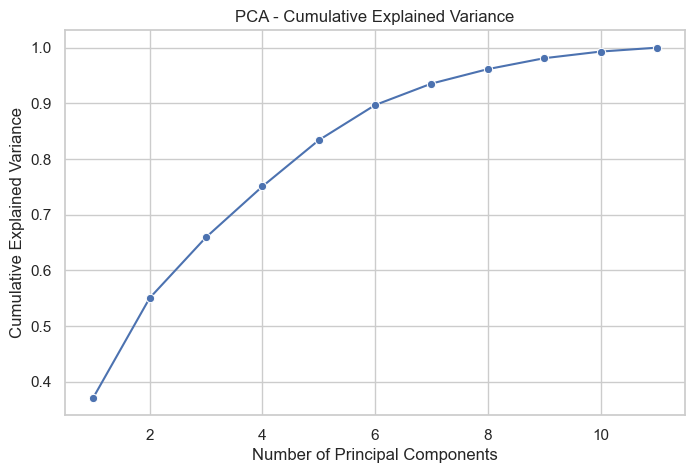

In [154]:
from sklearn.decomposition import PCA

# 1. Select the standardized financial columns
financial_cols = [
    'Market Cap(in B USD)', 'Revenue', 'Net Income', 'Earning Per Share',
    'Share Holder Equity', 'Current Ratio', 'Debt/Equity Ratio',
    'ROE', 'ROA', 'ROI', 'Net Profit Margin'
]

X = df_final[financial_cols]

# 2. Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# 3. Explained variance ratio (scree plot)
explained_var = pca.explained_variance_ratio_
cum_var = explained_var.cumsum()

# 4. Plot cumulative explained variance
plt.figure(figsize=(8, 5))
sns.lineplot(x=range(1, len(cum_var) + 1), y=cum_var, marker='o')
plt.title('PCA - Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [156]:
explained_var = pca.explained_variance_ratio_
cum_var = explained_var.cumsum()


In [157]:
for i, (ev, cv) in enumerate(zip(explained_var, cum_var), 1):
    print(f"PC{i}: Explained Variance = {ev:.4f}, Cumulative = {cv:.4f}")


PC1: Explained Variance = 0.3710, Cumulative = 0.3710
PC2: Explained Variance = 0.1790, Cumulative = 0.5499
PC3: Explained Variance = 0.1092, Cumulative = 0.6592
PC4: Explained Variance = 0.0913, Cumulative = 0.7505
PC5: Explained Variance = 0.0832, Cumulative = 0.8337
PC6: Explained Variance = 0.0632, Cumulative = 0.8969
PC7: Explained Variance = 0.0386, Cumulative = 0.9354
PC8: Explained Variance = 0.0260, Cumulative = 0.9614
PC9: Explained Variance = 0.0196, Cumulative = 0.9811
PC10: Explained Variance = 0.0119, Cumulative = 0.9930
PC11: Explained Variance = 0.0070, Cumulative = 1.0000


In [158]:
# Keep only the first 6 principal components
X_pca_reduced = X_pca[:, :6]

# Optional: Create a DataFrame with these components
df_pca_reduced = pd.DataFrame(X_pca_reduced, columns=[f'PC{i+1}' for i in range(6)])

# Now concatenate with non-financial columns (like Year, Company Name, Category)
df_final_reduced = pd.concat([df1[['Company_Full', 'Year', 'Category']].reset_index(drop=True),
                              df_pca_reduced.reset_index(drop=True)], axis=1)

df_final_reduced.head()


,Company_Full,Year,Category,PC1,PC2,PC3,PC4,PC5,PC6
0,Apple,2022,IT,6.944547,-2.187463,0.476614,0.481619,0.365752,-3.543103
1,Apple,2021,IT,7.125777,-2.139776,-0.380743,0.417870,0.052121,-2.973783
2,Apple,2020,IT,4.459230,-1.620614,-0.470221,0.253393,-0.062526,-1.721495
3,Apple,2019,IT,3.560183,-1.189263,-0.465641,0.135120,-0.030525,-0.791320
4,Apple,2018,IT,3.320699,-1.167332,-0.456907,0.043013,0.177811,-0.414311


In [159]:
# PCA components (loadings): each row is a PC, each column is a feature
loadings = pd.DataFrame(
    pca.components_, 
    columns=financial_cols,
    index=[f'PC{i+1}' for i in range(len(financial_cols))]
)

loadings.T  # Transpose to view features vs PCs


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Market Cap(in B USD),0.418572,-0.177794,-0.214725,0.039628,-0.104676,-0.150058,0.209183,0.348053,-0.514783,0.207567,-0.488929
Revenue,0.359511,-0.332156,-0.281437,0.028663,-0.078412,-0.094865,0.274932,0.119186,0.676226,0.274231,0.207295
Net Income,0.458802,-0.114009,-0.122634,0.006358,0.005194,-0.079376,-0.171086,0.015831,-0.365055,-0.346646,0.687129
Earning Per Share,0.208280,0.264579,0.066145,-0.313016,0.715071,0.092990,0.500986,-0.019637,0.003422,-0.113469,-0.005367
Share Holder Equity,0.319583,-0.284272,0.005226,-0.060105,-0.127496,0.688251,-0.021906,-0.492256,0.006630,-0.146639,-0.243163
Current Ratio,0.108762,0.432175,0.331122,0.111021,-0.569471,0.151039,0.540664,0.053092,-0.042827,-0.003100,0.187985
Debt/Equity Ratio,-0.001100,-0.404925,0.657125,-0.114041,0.102144,0.262792,-0.102091,0.537655,0.022909,0.063266,0.087749
ROE,0.253662,-0.190876,0.540549,0.037496,-0.001932,-0.596987,0.030429,-0.469656,0.046456,-0.044921,-0.153449
ROA,0.370361,0.375619,0.027782,-0.051501,-0.091692,-0.052144,-0.352492,0.310318,0.371667,-0.489866,-0.329454
ROI,0.067553,0.030155,0.066335,0.930382,0.318164,0.124834,0.039297,0.035028,0.030842,-0.056541,-0.028017


In [162]:
df_pca_final = df_final_reduced.rename(columns={
    "PC1": "Financial Strength Score",
    "PC2": "Liquidity & Profitability Score",
    "PC3": "Leverage & Efficiency Score",
    "PC4": "Return on Investment Score",
    "PC5": "Market Confidence Indicator",
    "PC6": "Capital Structure Variability"
})


In [163]:
df_pca_final

,Company_Full,Year,Category,Financial Strength Score,Liquidity & Profitability Score,Leverage & Efficiency Score,Return on Investment Score,Market Confidence Indicator,Capital Structure Variability
0,Apple,2022,IT,6.944547,-2.187463,0.476614,0.481619,0.365752,-3.543103
1,Apple,2021,IT,7.125777,-2.139776,-0.380743,0.417870,0.052121,-2.973783
2,Apple,2020,IT,4.459230,-1.620614,-0.470221,0.253393,-0.062526,-1.721495
3,Apple,2019,IT,3.560183,-1.189263,-0.465641,0.135120,-0.030525,-0.791320
4,Apple,2018,IT,3.320699,-1.167332,-0.456907,0.043013,0.177811,-0.414311
...,...,...,...,...,...,...,...,...,...
156,Amazon,2013,LOGI,-1.486082,-0.522382,-0.419633,-0.012158,0.318722,-0.599972
157,Amazon,2012,LOGI,-1.672440,-0.470967,-0.374601,-0.039236,0.326355,-0.534358
158,Amazon,2011,LOGI,-1.531317,-0.221880,-0.272013,0.042286,0.330261,-0.657601
159,Amazon,2010,LOGI,-1.306222,0.022599,-0.011175,0.077514,0.302288,-0.734055


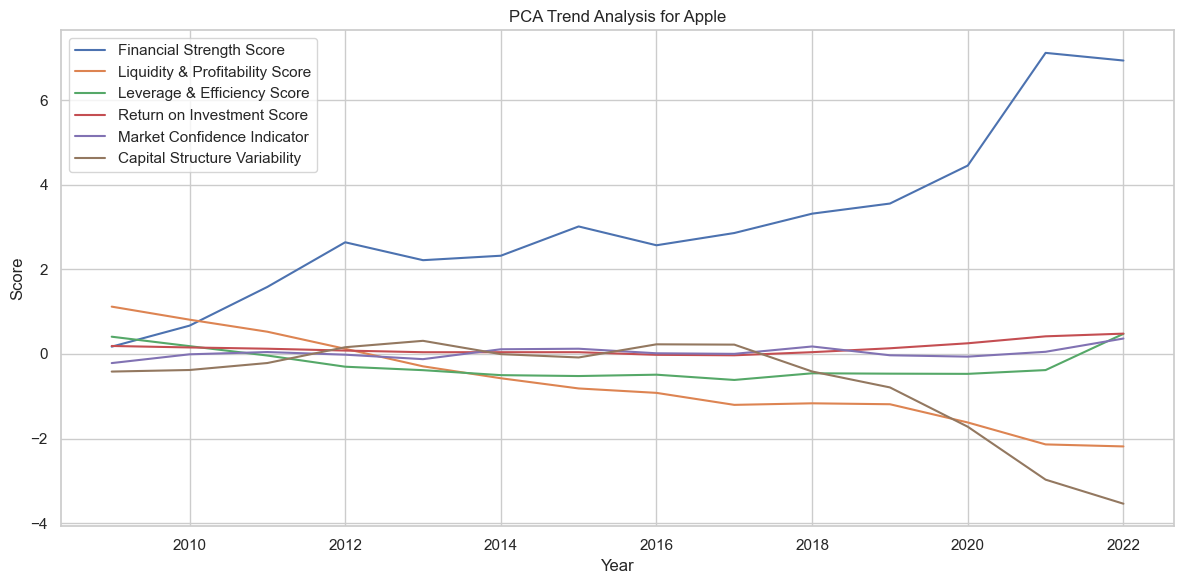

In [165]:
import matplotlib.pyplot as plt

company_name = "Apple"
df_company = df_pca_renamed[df_pca_renamed["Company_Full"] == company_name]

pca_cols = [
    "Financial Strength Score",
    "Liquidity & Profitability Score",
    "Leverage & Efficiency Score",
    "Return on Investment Score",
    "Market Confidence Indicator",
    "Capital Structure Variability"
]

plt.figure(figsize=(12, 6))
for col in pca_cols:
    plt.plot(df_company["Year"], df_company[col], label=col)

plt.title(f"PCA Trend Analysis for {company_name}")
plt.xlabel("Year")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


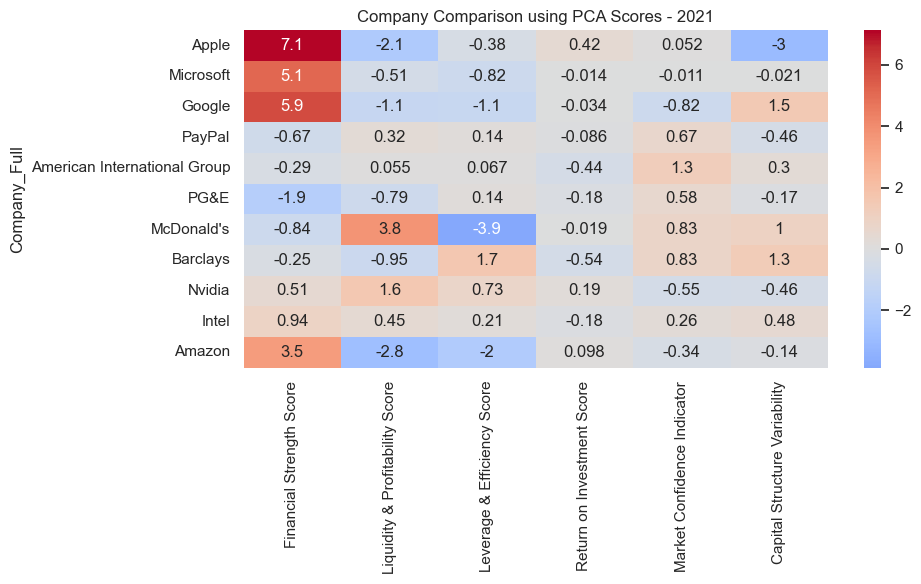

In [169]:
import seaborn as sns

selected_year = 2021
df_heat = df_pca_renamed[df_pca_renamed["Year"] == selected_year]

plt.figure(figsize=(10, 6))
sns.heatmap(df_heat.set_index("Company_Full")[pca_cols], annot=True, cmap="coolwarm", center=0)
plt.title(f"Company Comparison using PCA Scores - {selected_year}")
plt.tight_layout()
plt.show()


In [170]:
features = df_pca_final.drop(columns=["Company_Full", "Year", "Category"])


C:\Users\priya\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\priya\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\priya\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\priya\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\priya\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

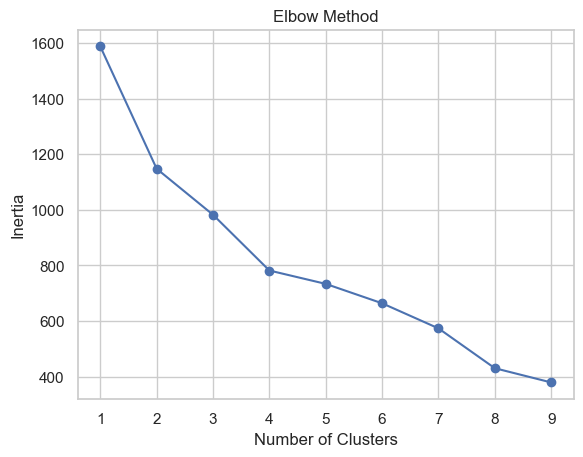

In [171]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()


In [194]:
# Use only the PCA columns (not Company_Full or any strings)
pca_features = df_pca_final[[
    "Financial Strength Score",
    "Liquidity & Profitability Score",
    "Leverage & Efficiency Score",
    "Return on Investment Score",
    "Market Confidence Indicator",
    "Capital Structure Variability"
]]

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_features)

# Add cluster info back to the full dataframe
df_pca_final["Cluster"] = clusters


C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [195]:
print(df_pca_final[["Company_Full", "Year", "Cluster"]].head(20))


   Company_Full  Year  Cluster
0         Apple  2022        2
1         Apple  2021        2
2         Apple  2020        2
3         Apple  2019        2
4         Apple  2018        2
5         Apple  2017        2
6         Apple  2016        2
7         Apple  2015        2
8         Apple  2014        2
9         Apple  2013        2
10        Apple  2012        2
11        Apple  2011        0
12        Apple  2010        0
13        Apple  2009        0
14    Microsoft  2023        2
15    Microsoft  2022        2
16    Microsoft  2021        2
17    Microsoft  2020        2
18    Microsoft  2019        2
19    Microsoft  2018        0


In [196]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score using the same PCA features
score = silhouette_score(pca_features, clusters)
print(f"Silhouette Score for k=3: {score:.4f}")


Silhouette Score for k=3: 0.4000


In [199]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_features)

dbscan = DBSCAN(eps=0.8, min_samples=5)
labels = dbscan.fit_predict(scaled_data)

df_pca_final["Cluster"] = labels


In [201]:
print(df_pca_final[["Company_Full", "Year", "Cluster"]].tail(20))

    Company_Full  Year  Cluster
141        Intel  2014        0
142        Intel  2013        0
143        Intel  2012        0
144        Intel  2011        0
145        Intel  2010        0
146        Intel  2009        0
147       Amazon  2022       -1
148       Amazon  2021       -1
149       Amazon  2020       -1
150       Amazon  2019       -1
151       Amazon  2018        0
152       Amazon  2017        0
153       Amazon  2016        0
154       Amazon  2015        0
155       Amazon  2014        0
156       Amazon  2013        0
157       Amazon  2012        0
158       Amazon  2011        0
159       Amazon  2010        0
160       Amazon  2009        0


In [202]:
df_pca_final["Company"] = df1["Company_Full"]  # or the appropriate original column name


In [207]:
# Group by cluster and calculate mean of only numeric columns
numeric_cols = df_pca_final.select_dtypes(include="number").columns
cluster_summary = df_pca_final.groupby("Cluster")[numeric_cols].mean()
print(cluster_summary)


                Year  Financial Strength Score  \
Cluster                                          
-1       2018.068182                  0.947071   
 0       2014.572816                 -0.273232   
 1       2015.500000                 -0.966302   

         Liquidity & Profitability Score  Leverage & Efficiency Score  \
Cluster                                                                 
-1                              0.089683                    -0.658808   
 0                              0.171678                     0.090493   
 1                             -1.544924                     1.404767   

         Return on Investment Score  Market Confidence Indicator  \
Cluster                                                            
-1                         0.175044                    -0.514571   
 0                        -0.012142                     0.140478   
 1                        -0.460805                     0.583710   

         Capital Structure Variability  Cl

In [208]:
# Example: based on interpretation
df_pca_final["Performance"] = df_pca_final["Cluster"].map({
    0: "Loss-Making",
    1: "Stable",
    2: "Profit-Making",
    3: "Uncertain"
})


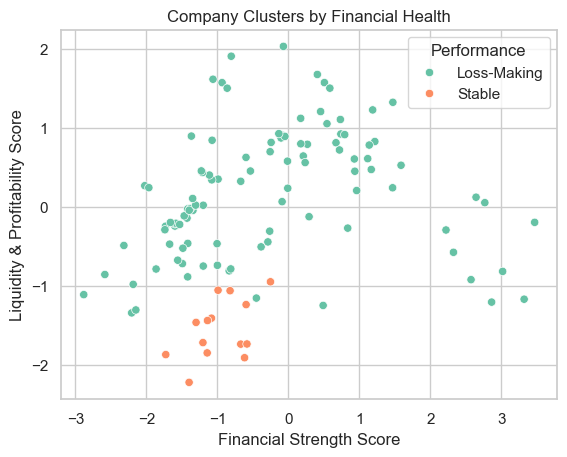

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    x="Financial Strength Score",
    y="Liquidity & Profitability Score",
    hue="Performance",
    data=df_pca_final,
    palette="Set2"
)
plt.title("Company Clusters by Financial Health")
plt.show()


In [212]:
df_ori_final = df_pca_final.drop(columns = ['Cluster','Company','Performance'])

In [213]:
df_ori_final

,Company_Full,Year,Category,Financial Strength Score,Liquidity & Profitability Score,Leverage & Efficiency Score,Return on Investment Score,Market Confidence Indicator,Capital Structure Variability
0,Apple,2022,IT,6.944547,-2.187463,0.476614,0.481619,0.365752,-3.543103
1,Apple,2021,IT,7.125777,-2.139776,-0.380743,0.417870,0.052121,-2.973783
2,Apple,2020,IT,4.459230,-1.620614,-0.470221,0.253393,-0.062526,-1.721495
3,Apple,2019,IT,3.560183,-1.189263,-0.465641,0.135120,-0.030525,-0.791320
4,Apple,2018,IT,3.320699,-1.167332,-0.456907,0.043013,0.177811,-0.414311
...,...,...,...,...,...,...,...,...,...
156,Amazon,2013,LOGI,-1.486082,-0.522382,-0.419633,-0.012158,0.318722,-0.599972
157,Amazon,2012,LOGI,-1.672440,-0.470967,-0.374601,-0.039236,0.326355,-0.534358
158,Amazon,2011,LOGI,-1.531317,-0.221880,-0.272013,0.042286,0.330261,-0.657601
159,Amazon,2010,LOGI,-1.306222,0.022599,-0.011175,0.077514,0.302288,-0.734055


In [215]:
# Assuming 'Net Income' column exists in your original df
df1["Profit_or_Loss"] = df1["Net Income"].apply(lambda x: 1 if x > 0 else 0)


C:\Users\priya\AppData\Local\Temp\ipykernel_15300\1646097033.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Profit_or_Loss"] = df1["Net Income"].apply(lambda x: 1 if x > 0 else 0)


In [216]:
# Make sure indexing matches or you align them properly
df_ori_final["Profit_or_Loss"] = df1["Profit_or_Loss"]


In [217]:
df_ori_final

,Company_Full,Year,Category,Financial Strength Score,Liquidity & Profitability Score,Leverage & Efficiency Score,Return on Investment Score,Market Confidence Indicator,Capital Structure Variability,Profit_or_Loss
0,Apple,2022,IT,6.944547,-2.187463,0.476614,0.481619,0.365752,-3.543103,1
1,Apple,2021,IT,7.125777,-2.139776,-0.380743,0.417870,0.052121,-2.973783,1
2,Apple,2020,IT,4.459230,-1.620614,-0.470221,0.253393,-0.062526,-1.721495,1
3,Apple,2019,IT,3.560183,-1.189263,-0.465641,0.135120,-0.030525,-0.791320,1
4,Apple,2018,IT,3.320699,-1.167332,-0.456907,0.043013,0.177811,-0.414311,1
...,...,...,...,...,...,...,...,...,...,...
156,Amazon,2013,LOGI,-1.486082,-0.522382,-0.419633,-0.012158,0.318722,-0.599972,1
157,Amazon,2012,LOGI,-1.672440,-0.470967,-0.374601,-0.039236,0.326355,-0.534358,0
158,Amazon,2011,LOGI,-1.531317,-0.221880,-0.272013,0.042286,0.330261,-0.657601,1
159,Amazon,2010,LOGI,-1.306222,0.022599,-0.011175,0.077514,0.302288,-0.734055,1


In [254]:
# ===================== MODEL 1: Logistic Regression (no SMOTE) =====================
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# 1. Encode
df_encoded1 = pd.get_dummies(df_ori_final, columns=['Company_Full', 'Category'])
X1 = df_encoded1.drop(columns=['Profit_or_Loss'])
y1 = df_encoded1['Profit_or_Loss']

# 2. Train-test split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# 3. Scale
scaler1 = StandardScaler()
X1_train_scaled = scaler1.fit_transform(X1_train)
X1_test_scaled = scaler1.transform(X1_test)

# 4. Train model
model1 = LogisticRegression()
model1.fit(X1_train_scaled, y1_train)

# 5. Predict & Evaluate
y1_pred = model1.predict(X1_test_scaled)
print("\n=== Model 1: Logistic Regression (No SMOTE) ===")
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("Report:\n", classification_report(y1_test, y1_pred))



=== Model 1: Logistic Regression (No SMOTE) ===
Accuracy: 0.9393939393939394
Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.94      1.00      0.97        30

    accuracy                           0.94        33
   macro avg       0.97      0.67      0.73        33
weighted avg       0.94      0.94      0.93        33



In [257]:
print(y1.value_counts())


Profit_or_Loss
1    136
0     25
Name: count, dtype: int64


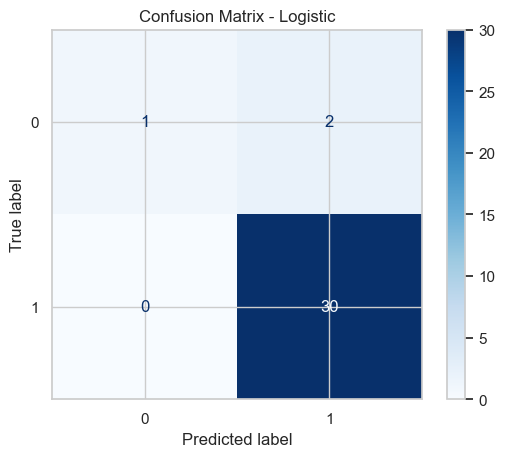

In [260]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Get confusion matrix values
cm = confusion_matrix(y1_test, y1_pred)

# 2. Optional: define class labels if needed (like Profit/Loss)
class_labels = model.classes_  # Automatically gets class names from training

# 3. Plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic")
plt.show()


In [255]:
# ===================== MODEL 2: Logistic Regression + SMOTE =====================
from imblearn.over_sampling import SMOTE

# 1. Encode
df_encoded2 = pd.get_dummies(df_ori_final, columns=['Company_Full', 'Category'])
X2 = df_encoded2.drop(columns=['Profit_or_Loss'])
y2 = df_encoded2['Profit_or_Loss']

# 2. Split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# 3. Apply SMOTE
smote2 = SMOTE(random_state=42)
X2_train_bal, y2_train_bal = smote2.fit_resample(X2_train, y2_train)

# 4. Scale
scaler2 = StandardScaler()
X2_train_bal_scaled = scaler2.fit_transform(X2_train_bal)
X2_test_scaled = scaler2.transform(X2_test)

# 5. Train model
model2 = LogisticRegression()
model2.fit(X2_train_bal_scaled, y2_train_bal)

# 6. Predict & Evaluate
y2_pred = model2.predict(X2_test_scaled)
print("\n=== Model 2: Logistic Regression + SMOTE ===")
print("Accuracy:", accuracy_score(y2_test, y2_pred))
print("Report:\n", classification_report(y2_test, y2_pred))



=== Model 2: Logistic Regression + SMOTE ===
Accuracy: 0.9393939393939394
Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.97      0.97      0.97        30

    accuracy                           0.94        33
   macro avg       0.82      0.82      0.82        33
weighted avg       0.94      0.94      0.94        33



In [258]:
print(y2.value_counts())


Profit_or_Loss
1    136
0     25
Name: count, dtype: int64


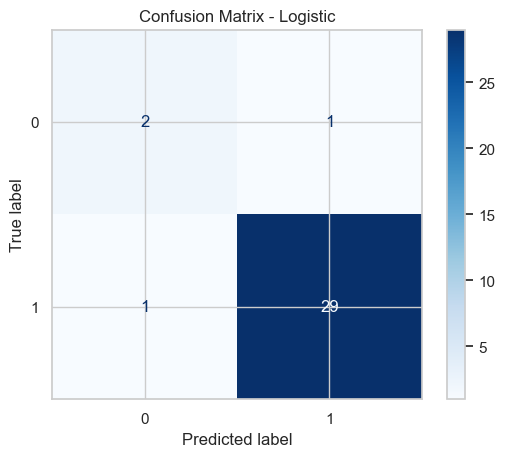

In [262]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Get confusion matrix values
cm = confusion_matrix(y2_test, y2_pred)

# 2. Optional: define class labels if needed (like Profit/Loss)
class_labels = model.classes_  # Automatically gets class names from training

# 3. Plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic")
plt.show()


In [256]:
# ===================== MODEL 3: Random Forest + SMOTE =====================
from sklearn.ensemble import RandomForestClassifier

# 1. Encode
df_encoded3 = pd.get_dummies(df_ori_final, columns=['Company_Full', 'Category'])
X3 = df_encoded3.drop(columns=['Profit_or_Loss'])
y3 = df_encoded3['Profit_or_Loss']

# 2. Split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# 3. SMOTE
smote3 = SMOTE(random_state=42)
X3_train_bal, y3_train_bal = smote3.fit_resample(X3_train, y3_train)

# 4. Scale (optional for RF)
scaler3 = StandardScaler()
X3_train_bal_scaled = scaler3.fit_transform(X3_train_bal)
X3_test_scaled = scaler3.transform(X3_test)

# 5. Train Random Forest
model3 = RandomForestClassifier(random_state=42)
model3.fit(X3_train_bal_scaled, y3_train_bal)

# 6. Predict & Evaluate
y3_pred = model3.predict(X3_test_scaled)
print("\n=== Model 3: Random Forest + SMOTE ===")
print("Accuracy:", accuracy_score(y3_test, y3_pred))
print("Report:\n", classification_report(y3_test, y3_pred))



=== Model 3: Random Forest + SMOTE ===
Accuracy: 0.9696969696969697
Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.97      0.98        30

    accuracy                           0.97        33
   macro avg       0.88      0.98      0.92        33
weighted avg       0.98      0.97      0.97        33



In [259]:
print(y3.value_counts())

Profit_or_Loss
1    136
0     25
Name: count, dtype: int64


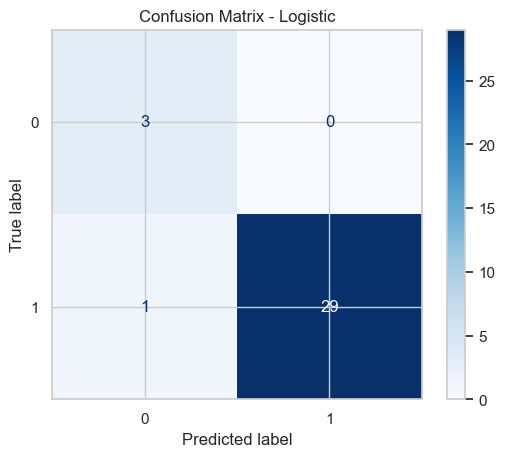

In [263]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Get confusion matrix values
cm = confusion_matrix(y3_test, y3_pred)

# 2. Optional: define class labels if needed (like Profit/Loss)
class_labels = model.classes_  # Automatically gets class names from training

# 3. Plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic")
plt.show()


In [264]:
def predict_logistic_smote(input_data, model2, scaler2, X2_columns):
    """
    Predicts Profit_or_Loss using Logistic Regression (with SMOTE-preprocessed model)
    
    Parameters:
        input_data (dict): Raw input data for a single company
        model2: Trained Logistic Regression model
        scaler2: Scaler used during training
        X2_columns: Feature columns from training set
        
    Returns:
        str: Predicted label ('Profit' or 'Loss')
    """
    import pandas as pd

    # Convert input dict to DataFrame
    df_input = pd.DataFrame([input_data])

    # One-hot encode
    df_input = pd.get_dummies(df_input)

    # Add missing columns
    for col in X2_columns:
        if col not in df_input.columns:
            df_input[col] = 0

    # Reorder columns
    df_input = df_input[X2_columns]

    # Scale input
    df_scaled = scaler2.transform(df_input)

    # Predict
    prediction = model2.predict(df_scaled)
    return prediction[0]


In [265]:
def predict_rf_smote(input_data, model3, scaler3, X3_columns):
    """
    Predicts Profit_or_Loss using Random Forest (with SMOTE-preprocessed model)
    
    Parameters:
        input_data (dict): Raw input data for a single company
        model3: Trained Random Forest model
        scaler3: Scaler used during training
        X3_columns: Feature columns from training set
        
    Returns:
        str: Predicted label ('Profit' or 'Loss')
    """
    import pandas as pd

    # Convert input dict to DataFrame
    df_input = pd.DataFrame([input_data])

    # One-hot encode
    df_input = pd.get_dummies(df_input)

    # Add missing columns
    for col in X3_columns:
        if col not in df_input.columns:
            df_input[col] = 0

    # Reorder columns
    df_input = df_input[X3_columns]

    # Scale input
    df_scaled = scaler3.transform(df_input)

    # Predict
    prediction = model3.predict(df_scaled)
    return prediction[0]


In [267]:
new_input = {
    'Company_Full': 'Apple',
    'Year': 2023,
    'Category': 'IT',
    'Financial Strength Score': -5.0,
    'Liquidity & Profitability Score': -1.5,
    'Leverage & Efficiency Score': 0.3,
    'Return on Investment Score': -0.4,
    'Market Confidence Indicator': 0.2,
    'Capital Structure Variability': -1.0
}

# Logistic prediction
logistic_result = predict_logistic_smote(new_input, model2, scaler2, X2.columns)
print("Logistic SMOTE Prediction:", logistic_result)

# Random Forest prediction
rf_result = predict_rf_smote(new_input, model3, scaler3, X3.columns)
print("Random Forest SMOTE Prediction:", rf_result)


Logistic SMOTE Prediction: 0
Random Forest SMOTE Prediction: 0


In [268]:
import pickle

with open("model_rf.pkl", "wb") as f:
    pickle.dump(model3, f)


In [269]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler3, f)


In [274]:
import json

# Extract unique values for each column
company_list = df_ori_final['Company_Full'].unique().tolist()
year_list = df_ori_final['Year'].unique().tolist()
category_list = df_ori_final['Category'].unique().tolist()

# Organize into a dictionary
columns_fin = {
    "Company_Full": company_list,
    "Year": year_list,
    "Category": category_list
}

# Save to JSON file
with open("columns_fin.json", "w") as f:
    json.dump(columns_fin, f, indent=4)


In [273]:
import os
print(os.getcwd())


C:\Users\priya


In [277]:
df_ori_final['Company_Full'].unique()

array(['Apple', 'Microsoft', 'Google', 'PayPal',
       'American International Group', 'PG&E', 'Sears Holdings',
       "McDonald's", 'Barclays', 'Nvidia', 'Intel', 'Amazon'],
      dtype=object)